1) Prepare a classification model using SVM for salary data 

In [23]:
# Importig Libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [24]:
# Loading dataset

data = pd.read_csv('/content/forestfires (1).csv')

EDA & Data preprocessing

In [25]:
data.shape

(517, 31)

In [26]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [27]:
data.sample(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
224,sep,wed,90.1,82.9,735.7,6.2,15.4,57,4.5,0.0,37.71,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,large
358,sep,fri,92.5,122.0,789.7,10.2,19.7,39,2.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,small
141,aug,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,small
301,jun,mon,90.4,93.3,298.1,7.5,19.1,39,5.4,0.0,3.52,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,small
23,aug,sat,90.2,110.9,537.4,6.2,19.5,43,5.8,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
249,aug,wed,93.1,157.3,666.7,13.5,21.7,40,0.4,0.0,2.47,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,small
208,sep,fri,92.4,117.9,668.0,12.2,19.6,33,6.3,0.0,19.23,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,large
406,sep,sat,87.1,291.3,860.6,4.0,17.0,67,4.9,0.0,3.95,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,small
142,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
123,sep,tue,84.4,73.4,671.9,3.2,17.9,45,3.1,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,small


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [29]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449,0.017408,0.355899,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138,0.130913,0.479249,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [31]:
# Dropping columns which are not required

data = data.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu','daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 
                  'monthfeb','monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov','monthoct','monthsep'], 
                 axis = 1)
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [32]:
# Checking how much datapoints are having small and large area
data.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

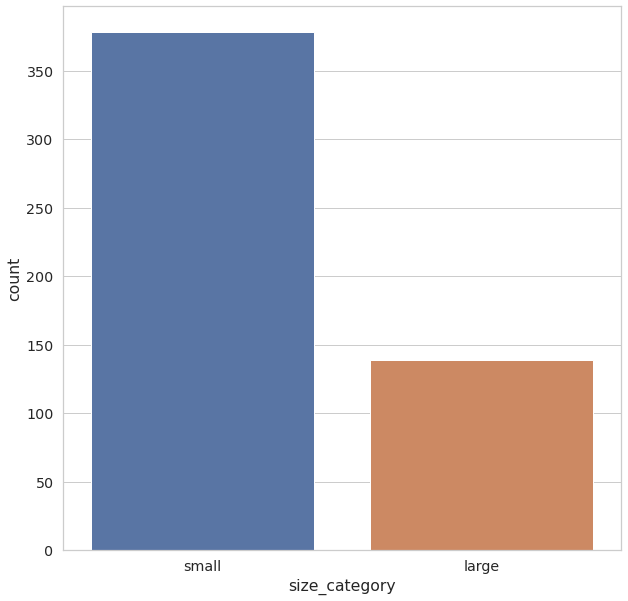

In [33]:
import seaborn as sns
sns.countplot(x = 'size_category', data = data)

In [34]:
# Checking for which value of area is categorised into large and small by creating crosstab between area and size_category
pd.crosstab(data.area, data.size_category)

size_category,large,small
area,,
0.00,0,247
0.09,0,1
0.17,0,1
0.21,0,1
0.24,0,1
...,...,...
200.94,1,0
212.88,1,0
278.53,1,0


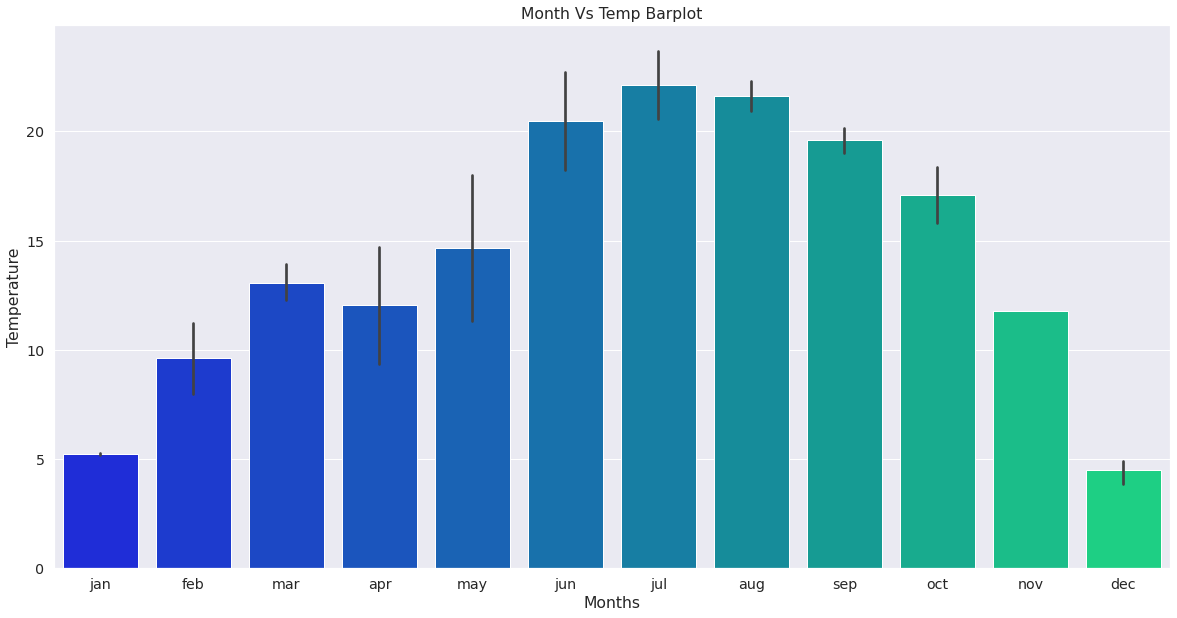

In [35]:
# Plotting Month Vs. temp plot
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'temp', data = data,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'winter');
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature");


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


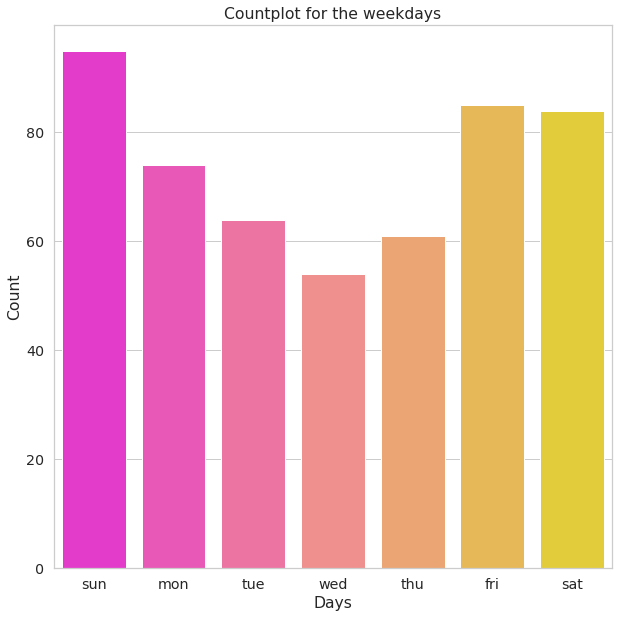

In [36]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.set(style = 'whitegrid', font_scale = 1.3)
day = sns.countplot(data['day'], order = ['sun' ,'mon', 'tue', 'wed', 'thu', 'fri', 'sat'], palette = 'spring')
day.set(title = 'Countplot for the weekdays', xlabel = 'Days', ylabel = 'Count');

Text(0.5, 1.0, 'HeatMap of Features for the Classes')

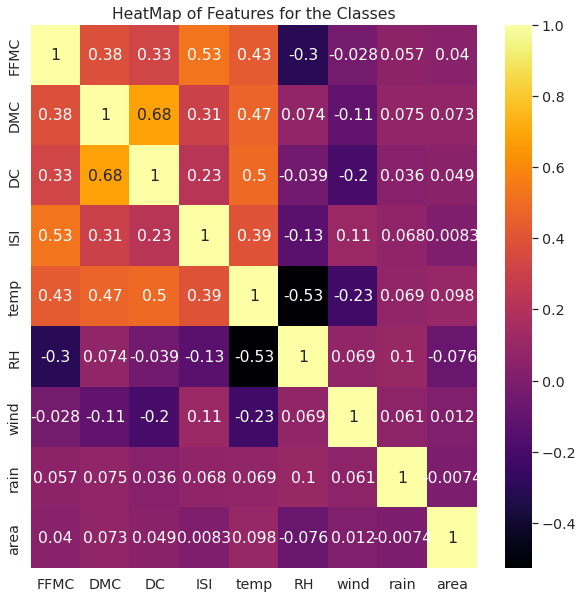

In [37]:
sns.heatmap(data.corr(), annot=True, cmap="inferno")
ax = plt.gca()
ax.set_title("HeatMap of Features for the Classes")

In [38]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [39]:
# Encoding month and day features

data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                           (1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
data.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
data.head()


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [40]:
# Encoding target variable 'size category'

data.size_category.replace(('small', 'large'), (0, 1), inplace = True)
data.sample(5)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
355,9,5,92.1,99.0,745.3,9.6,20.8,35,4.9,0.0,13.06,1
384,8,6,91.6,273.8,819.1,7.7,21.3,44,4.5,0.0,12.18,1
121,8,1,91.5,145.4,608.2,10.7,17.1,43,5.4,0.0,0.00,0
348,9,5,92.1,99.0,745.3,9.6,17.4,57,4.5,0.0,0.00,0
404,9,3,87.9,84.8,725.1,3.7,21.8,34,2.2,0.0,6.04,1


In [41]:
data.corr()['size_category'].sort_values(ascending=False)

size_category    1.000000
area             0.311322
month            0.080316
wind             0.059113
rain             0.050001
DMC              0.034715
FFMC             0.022063
DC               0.019428
day              0.016796
temp             0.006021
ISI             -0.008726
RH              -0.045243
Name: size_category, dtype: float64

In [42]:
# Standardizing data

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [43]:
scaler.fit(data.drop('size_category',axis=1))

StandardScaler()

In [44]:
scaled_features=scaler.transform(data.drop('size_category',axis=1))
data_head=pd.DataFrame(scaled_features,columns=data.columns[:-1])
data_head

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-1.968443,0.357721,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020
1,1.110120,-1.090909,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020
2,1.110120,0.840597,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020
3,-1.968443,0.357721,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020
4,-1.968443,1.323474,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020
...,...,...,...,...,...,...,...,...,...,...,...
512,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753
513,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674
514,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532
515,0.230531,0.840597,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020


In [45]:
# Splitting data into test data and train data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_head,data['size_category'], test_size=0.3, random_state=42)

In [46]:
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (361, 11)
Shape of x_test:  (156, 11)
Shape of y_train:  (361,)
Shape of y_test:  (156,)


Building SVM model

In [47]:
from sklearn import metrics

svc = SVC()
svc.fit(x_train, y_train)
# make predictions
prediction = svc.predict(x_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87       115
           1       0.90      0.22      0.35        41

    accuracy                           0.79       156
   macro avg       0.84      0.61      0.61       156
weighted avg       0.81      0.79      0.74       156

[[114   1]
 [ 32   9]]
Accuracy: 0.7884615384615384
Precision: 0.9
Recall: 0.21951219512195122


Building SVM model with Hyper Parameters

In [48]:
model = SVC(kernel='rbf',gamma=15, C=1)

In [49]:
model.fit(x_train, y_train)
# make predictions
prediction = model.predict(x_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85       115
           1       0.75      0.07      0.13        41

    accuracy                           0.75       156
   macro avg       0.75      0.53      0.49       156
weighted avg       0.75      0.75      0.66       156

[[114   1]
 [ 38   3]]
Accuracy: 0.75
Precision: 0.75
Recall: 0.07317073170731707


Building model with Grid Search CV


In [ ]:
clf = SVC()
param_grid = [{'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

In [51]:
gsv.best_params_ , gsv.best_score_

({'C': 15, 'gamma': 50, 'kernel': 'linear'}, 0.9805555555555554)

Buildinf final SVM model with 'C': 15, 'gamma': 50, 'kernel': 'linear'

In [52]:
final_model = SVC(C= 15, gamma = 50, kernel = 'linear')

In [53]:
final_model.fit(x_train, y_train)
# make predictions
prediction = final_model.predict(x_test)
# summarize the fit of the final_model
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       115
           1       0.95      0.95      0.95        41

    accuracy                           0.97       156
   macro avg       0.97      0.97      0.97       156
weighted avg       0.97      0.97      0.97       156

[[113   2]
 [  2  39]]
Accuracy: 0.9743589743589743
Precision: 0.9512195121951219
Recall: 0.9512195121951219


Q2. Prepare a classification model using SVM for salary data 


In [54]:
# Importig Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [55]:
# Loading data
train_data = pd.read_csv('/content/SalaryData_Train(1).csv')
test_data = pd.read_csv('/content/SalaryData_Test(1).csv')

EDA & Data Preprocessing

In [56]:
train_data.shape

(417, 14)

In [57]:
test_data.shape

(15060, 14)

In [59]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [60]:
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [61]:
# Checking for null values
train_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           1
dtype: int64

In [62]:
test_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [63]:
train_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [64]:
# frequency for categorical fields 
category_col =['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary'] 
for c in category_col:
    print (c)
    print (train_data[c].value_counts())
    print('\n')

workclass
 Private             304
 Self-emp-not-inc     33
 Local-gov            31
 State-gov            20
 Federal-gov          16
 Self-emp-inc         13
Name: workclass, dtype: int64


education
 HS-grad         130
 Some-college     96
 Bachelors        68
 Masters          28
 Assoc-acdm       21
 11th             20
 Assoc-voc        15
 9th               8
 7th-8th           7
 Doctorate         6
 Prof-school       5
 10th              5
 5th-6th           5
 Preschool         1
 1st-4th           1
 12th              1
Name: education, dtype: int64


maritalstatus
 Married-civ-spouse       197
 Never-married            136
 Divorced                  59
 Separated                 10
 Widowed                    9
 Married-spouse-absent      5
 Married-AF-spouse          1
Name: maritalstatus, dtype: int64


occupation
 Craft-repair         56
 Sales                55
 Prof-specialty       54
 Exec-managerial      53
 Other-service        50
 Adm-clerical         43
 Machine-

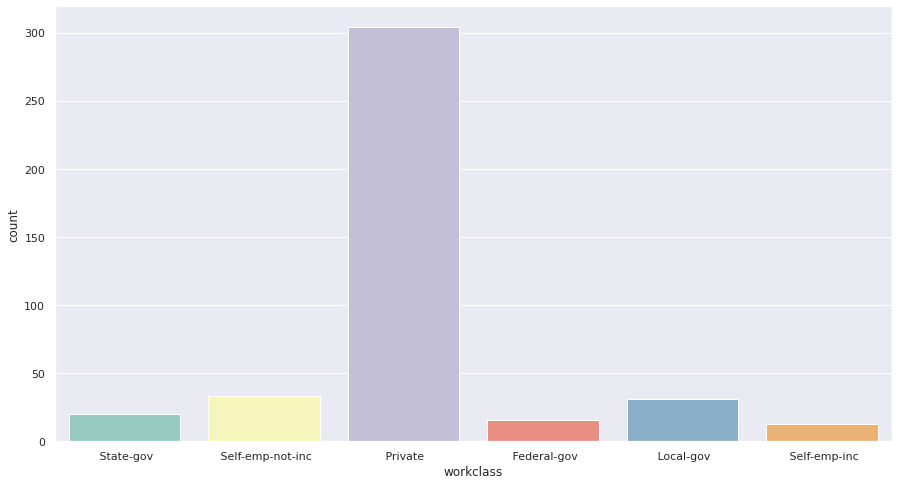

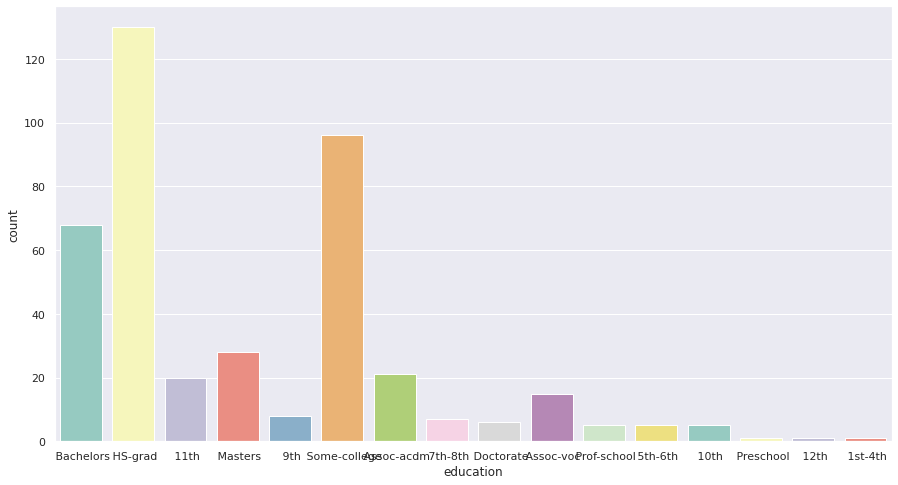

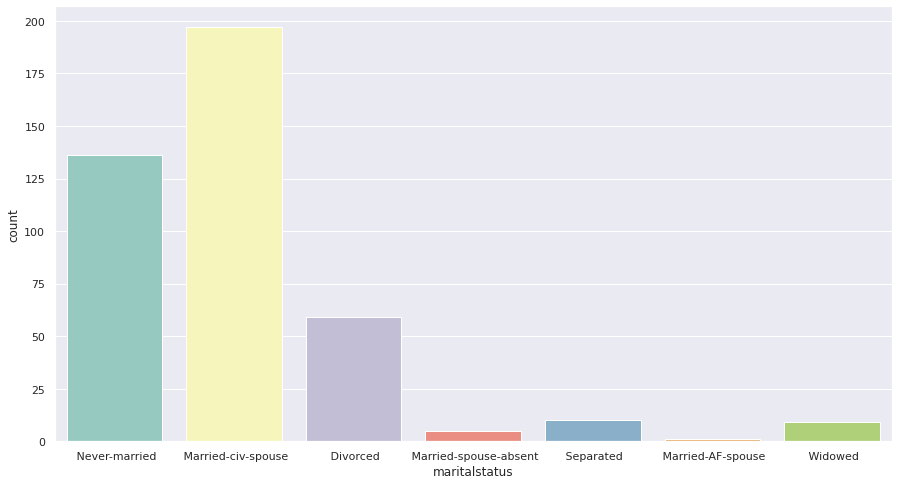

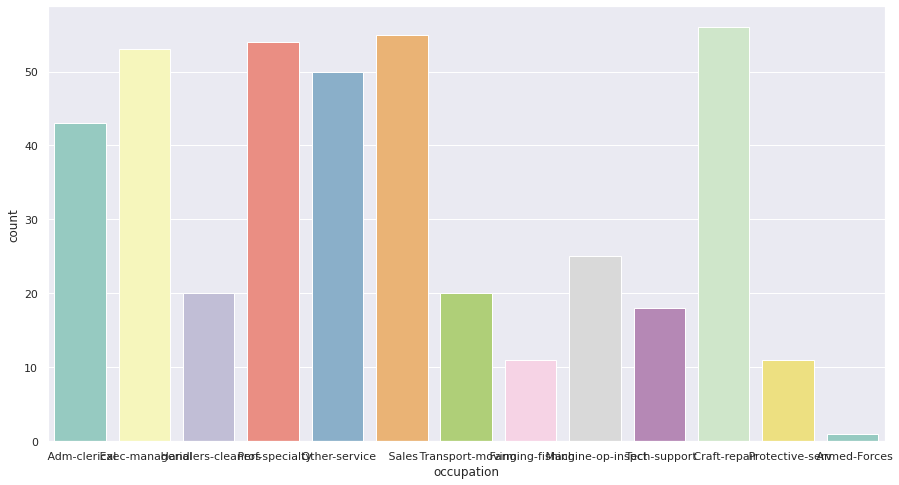

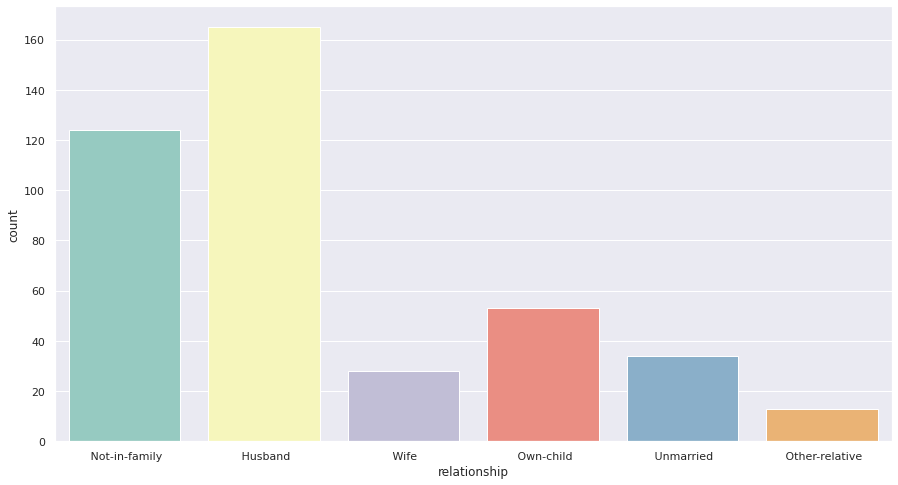

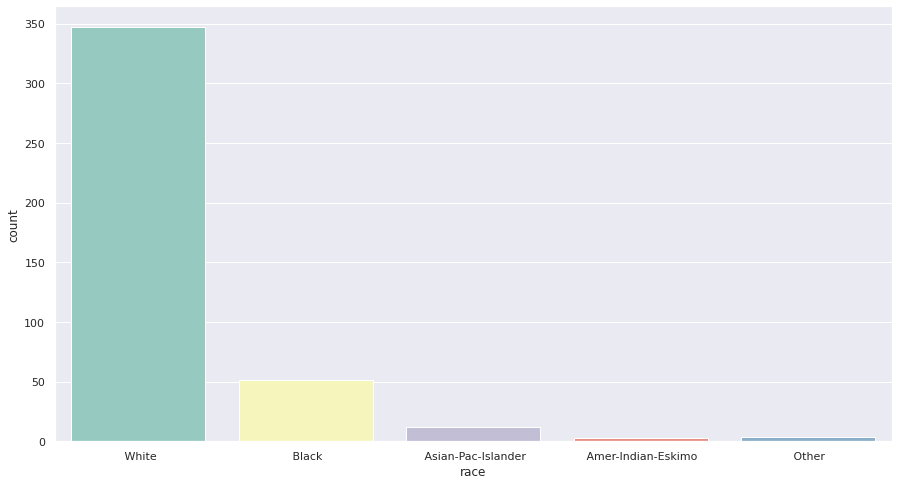

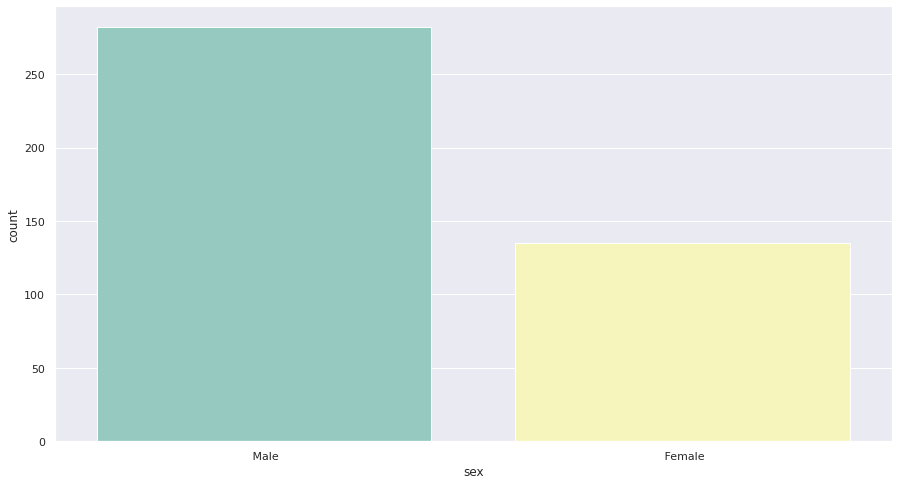

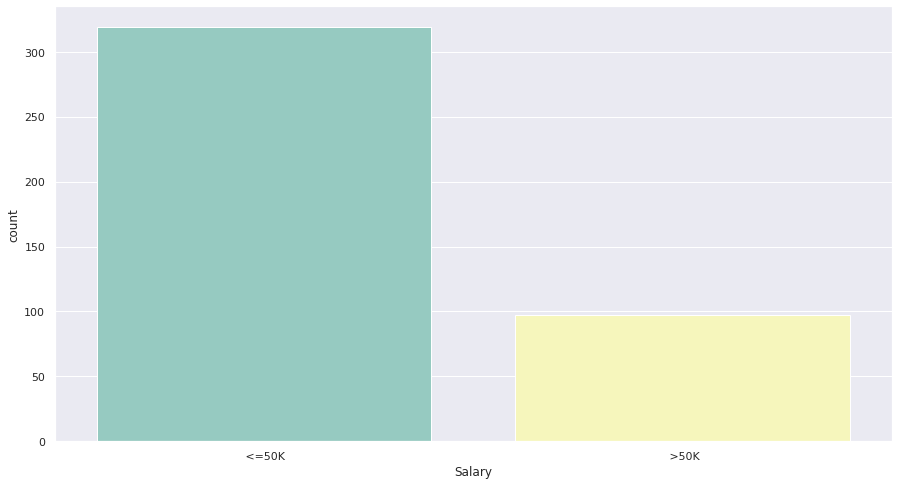

In [65]:
# countplot for all categorical columns
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})
cat_col = ['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex','Salary']
for col in cat_col:
    plt.figure() #this creates a new figure on which your plot will appear
    sns.countplot(x = col, data = train_data, palette = 'Set3');


In [66]:
# printing unique values from each categoricla columns

print('workclass',train_data.workclass.unique())
print('education',train_data.education.unique())
print('maritalstatus',train_data['maritalstatus'].unique())
print('occupation',train_data.occupation.unique())
print('relationship',train_data.relationship.unique())
print('race',train_data.race.unique())
print('sex',train_data.sex.unique())
print('native',train_data['native'].unique())
print('Salary',train_data.Salary.unique())

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc']
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
maritalstatus [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces']
relationship [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex [' Male' ' Female']
native [' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras' ' England' ' Canada' ' Germany' 

In [67]:
train_data[['Salary', 'age']].groupby(['Salary'], as_index=False).mean().sort_values(by='age', ascending=False)

,Salary,age
1,>50K,42.731959
0,<=50K,36.416928


<Figure size 1440x360 with 0 Axes>

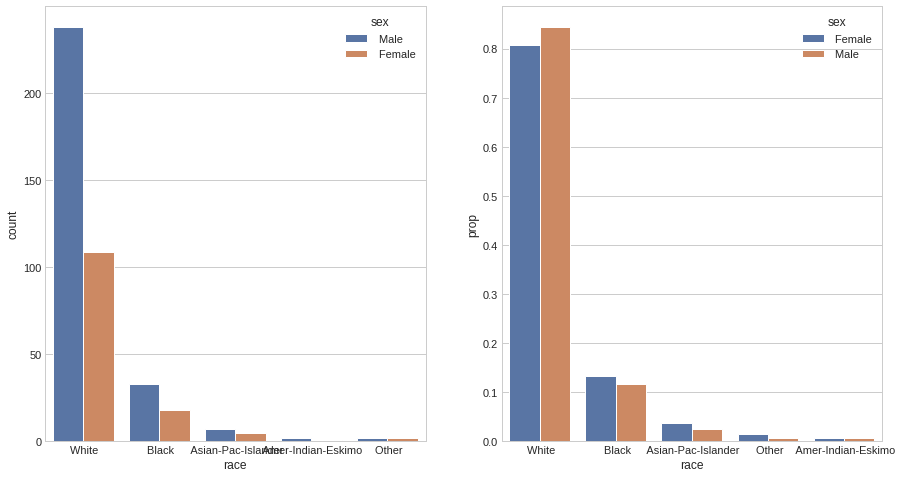

In [68]:
plt.style.use('seaborn-whitegrid')
x, y, hue = "race", "prop", "sex"
#hue_order = ["Male", "Female"]
plt.figure(figsize=(20,5)) 
f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=train_data, ax=axes[0])

prop_df = (train_data[x]
           .groupby(train_data[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


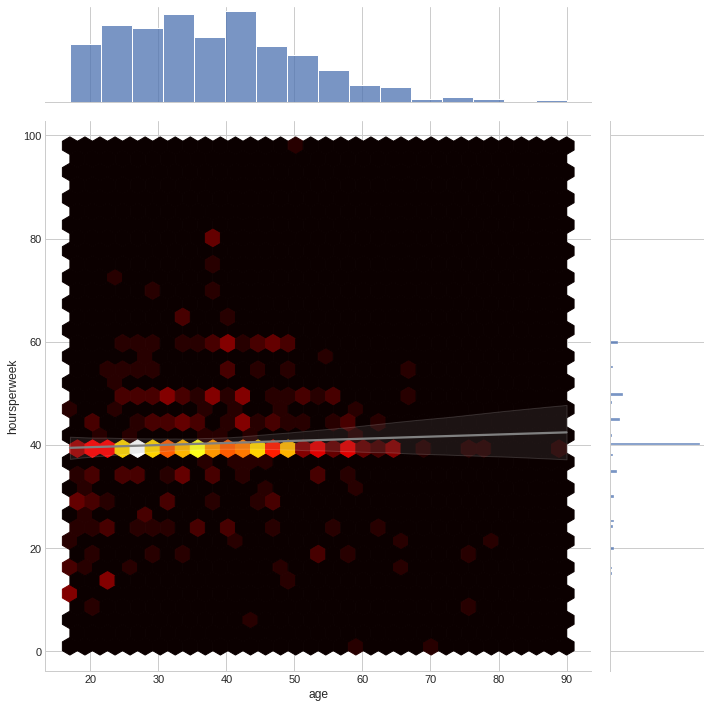

In [69]:
g = sns.jointplot(x = 'age', 
              y = 'hoursperweek',
              data = train_data, 
              kind = 'hex', 
              cmap= 'hot', 
              size=10)

#http://stackoverflow.com/questions/33288830/how-to-plot-regression-line-on-hexbins-with-seaborn
sns.regplot(train_data.age, train_data['hoursperweek'], ax=g.ax_joint, scatter=False, color='grey')

Feature encoding

In [70]:
from sklearn.preprocessing import LabelEncoder

In [71]:
train_data = train_data.apply(LabelEncoder().fit_transform)
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,5,0,22,22,0
1,33,4,9,12,2,3,0,4,1,0,0,5,22,0
2,21,2,11,8,0,5,1,4,1,0,0,22,22,0
3,36,2,1,6,2,5,0,2,1,0,0,22,22,0
4,11,2,9,12,2,8,5,2,0,0,0,22,3,0


In [72]:
test_data = test_data.apply(LabelEncoder().fit_transform)
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


Test-Train-Split

In [73]:
drop_elements = ['education', 'native', 'Salary']
X = train_data.drop(drop_elements, axis=1)

In [74]:
y = train_data['Salary']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Building SVM Model

In [76]:
from sklearn import metrics

svc = SVC()
svc.fit(X_train, y_train)
# make predictions
prediction = svc.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87       101
           1       0.89      0.22      0.35        37

    accuracy                           0.78       138
   macro avg       0.83      0.60      0.61       138
weighted avg       0.81      0.78      0.73       138

[[100   1]
 [ 29   8]]
Accuracy: 0.782608695652174
Precision: 0.8888888888888888
Recall: 0.21621621621621623


Testing it on new test data from SalaryData_Test(1).csv

In [77]:
drop_elements = ['education', 'native', 'Salary']
X_new = test_data.drop(drop_elements, axis=1)

y_new = test_data['Salary']

In [78]:
# make predictions
new_prediction = svc.predict(X_new)
# summarize the fit of the model
print(metrics.classification_report(y_new, new_prediction))
print(metrics.confusion_matrix(y_new, new_prediction))

print("Accuracy:",metrics.accuracy_score(y_new, new_prediction))
print("Precision:",metrics.precision_score(y_new, new_prediction))
print("Recall:",metrics.recall_score(y_new, new_prediction))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85     11360
           1       0.18      0.01      0.02      3700

    accuracy                           0.74     15060
   macro avg       0.47      0.50      0.44     15060
weighted avg       0.61      0.74      0.65     15060

[[11151   209]
 [ 3653    47]]
Accuracy: 0.7435590969455511
Precision: 0.18359375
Recall: 0.012702702702702703


Building SVM model with Hyper Parameters kernel='rbf',gamma=15, C=1

In [79]:
model = SVC(kernel='rbf',gamma=15, C=1)

In [80]:
model.fit(X_train, y_train)
# make predictions
prediction = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       101
           1       1.00      0.03      0.05        37

    accuracy                           0.74       138
   macro avg       0.87      0.51      0.45       138
weighted avg       0.81      0.74      0.64       138

[[101   0]
 [ 36   1]]
Accuracy: 0.7391304347826086
Precision: 1.0
Recall: 0.02702702702702703


Testing above model on SalaryData_Test(1).csv

In [81]:
# make predictions
new_prediction = model.predict(X_new)
# summarize the fit of the model
print(metrics.classification_report(y_new, new_prediction))
print(metrics.confusion_matrix(y_new, new_prediction))

print("Accuracy:",metrics.accuracy_score(y_new, new_prediction))
print("Precision:",metrics.precision_score(y_new, new_prediction))
print("Recall:",metrics.recall_score(y_new, new_prediction))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     11360
           1       0.00      0.00      0.00      3700

    accuracy                           0.75     15060
   macro avg       0.38      0.50      0.43     15060
weighted avg       0.57      0.75      0.65     15060

[[11360     0]
 [ 3700     0]]
Accuracy: 0.7543160690571049
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Building SVM model with Hyper Parameters kernel='linear',gamma=0.22, C=0.1

In [82]:
model_2 = SVC(kernel='linear',gamma=0.22, C=1)

In [83]:
model_2.fit(X_train, y_train)
# make predictions
prediction = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       101
           1       1.00      0.03      0.05        37

    accuracy                           0.74       138
   macro avg       0.87      0.51      0.45       138
weighted avg       0.81      0.74      0.64       138

[[101   0]
 [ 36   1]]
Accuracy: 0.7391304347826086
Precision: 1.0
Recall: 0.02702702702702703
